In [1]:
import math
import numpy as np
import random as rn
import matplotlib.pyplot as plt
# dimension -- размерность модели
# L -- размер решетки
# J -- мера силы взаимодействия
# T -- температура
# N -- число шагов МК
# H -- маг. поле
def neighbour_sum_of_spin(x, y, z=None):
    """
    Возвращает сумму спинов ближайших соседей (i,j)-ой частицы
    """
    global dimension
    sum = 0
    if dimension==2:
        ###################################        
        x_up = 0
        x_down = 0
        y_up = 0
        y_down = 0
        
        if (x>0):
            x_down = x-1
        else:
            x_down = L-1
            
        if (x<(L-1)):
            x_up = x+1
        else:
            x_up = 0
            
        if (y>0):
            y_right = y-1
        else:
            y_right = L-1
            
        if (y<(L-1)):
            y_left = y+1
        else:
            y_left = 0
        
#        if (x==0) and (y==0):
#            sum = spin_matrix[(x+1), y] + spin_matrix[(L-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (L-1)] 
#            return sum
#        if (x==(L-1)) and (y==0):
#            sum = spin_matrix[0, y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (L-1)] 
#            return sum
#        if (x==0) and (y==(L-1)):
#            sum = spin_matrix[(x+1), y] + spin_matrix[(L-1), y] + spin_matrix[x, 0] + spin_matrix[x, (y-1)] 
#            return sum
#        if (x==(L-1)) and (y==(L-1)):
#            sum = spin_matrix[0, y] + spin_matrix[(x-1), y] + spin_matrix[x, 0] + spin_matrix[x, (y-1)] 
#            return sum
#        if (x==0):
#            sum = sum = spin_matrix[(x+1), y] + spin_matrix[(L-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (y-1)] 
#            return sum
#        if (y==0):
#            sum = spin_matrix[(x+1), y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (L-1)] 
#            return sum
#        if (x==(L-1)):
#            sum = spin_matrix[0, y] + spin_matrix[(x-1), y] + spin_matrix[x, (y+1)] + spin_matrix[x, (y-1)] 
#            return sum
#        if (y==(L-1)):
#            sum = spin_matrix[(x+1), y] + spin_matrix[(x-1), y] + spin_matrix[x, 0] + spin_matrix[x, (y-1)] 
#            return sum
        #####################################
        #print(x,y, x_up, x_down, y_left, y_right)
        sum = spin_matrix[x, y_left] + spin_matrix[x, y_right] + spin_matrix[x_up, y] + spin_matrix[x_down, y]
        return sum
    
    if dimension==3:    
        sum = spin_matrix[(x+1), y, z] + spin_matrix[(x-1), y, z] \
        + spin_matrix[x, (y+1), z] + spin_matrix[x, (y-1), z] + spin_matrix[x, y, (z+1)] + spin_matrix[x, y, (z-1)]
        return sum


def energy():
    """
    Вычисляем полную энергию системы
    """
    global dimension, J, H
    energy = 0
    if dimension==2:
        for i in range(L):
            for j in range(L):  
                energy += -spin_matrix[i, j]*(0.5*J*neighbour_sum_of_spin(i, j) + H)
        return energy

def mag_moment():
    """
    Вычисляем магнитный момент
    """
    calc_mag_moment = 0
    if dimension==2:
        for i in range(L):
            for j in range(L):  
                calc_mag_moment += spin_matrix[i, j]
        return calc_mag_moment/(L**2)
    
def metropolis_step():
    global sum_of_M, sum_of_energy, sum_of_energy_square, sum_of_M_square
    """
    Выполнить один шаг метода Метрополиса 
    """
    x = 0
    y = 0
    z = 0    
    if (dimension==2):
        x = np.random.randint(L) 
        y = np.random.randint(L)         
        start_energy = energy()
        spin_matrix[x,y] *= -1
        before_energy = energy()
        delta_E = before_energy - start_energy
        if (delta_E<=0): #принимаем
            sum_of_M += mag_moment()
            sum_of_M_square += (mag_moment())**2
            sum_of_energy += energy()
            sum_of_energy_square += (energy())**2
            # определяем значения требуемых физ. величин
        if (delta_E>0):
            W = math.exp(-(1/T)*delta_E) # вычисляем вероятность перехода
            if W>=rn.random():     # принимаем
                sum_of_M += mag_moment()
                sum_of_M_square += (mag_moment())**2
                sum_of_energy += before_energy
                sum_of_energy_square += (energy())**2
                # определяем значения требуемых физ. величин
            else: 
                spin_matrix[x,y] *= -1 # не принимаем, возвращаем предыдущую конфигурацию
                sum_of_M += mag_moment()
                sum_of_M_square += (mag_moment())**2
                sum_of_energy += start_energy
                sum_of_energy_square += (energy())**2
    if (dimension==3):
        x = np.random.randint(L) 
        y = np.random.randint(L) 
        z = np.random.randint(L) 
        step_matrix
        return -1

def initialize(opt):
    """
    Функция задает начальные расположения спинов
    """
    if opt=="hot":
        spin_matrix = np.random.randint(2, size=(L, L)) #lxl Lattice with random spin configuration 
        spin_matrix[spin_matrix==0] = -1 
        return spin_matrix
    if opt=="cold":
        spin_matrix = np.random.randint(2, size=(L, L)) #lxl Lattice with random spin configuration 
        spin_matrix[spin_matrix==0] = -1 
        spin_matrix[spin_matrix==1] = -1
        return spin_matrix
    
def susceptibility():
    """
    Расчет восприимчивости
    """
    global L, N, T, sum_of_M, sum_of_M_square
    average_energy = (sum_of_M/N)**2
    expected_value = sum_of_M_square/(N) - average_energy
    
    result = (1/(L**2 * T**2))*expected_value
    return result

def heat_capacity():
    """
    Расчет теплоемокости
    """
    global L, N, T, sum_of_energy, sum_of_energy_square
    average_energy = (sum_of_energy/N)**2
    expected_value = sum_of_energy_square/(N) - average_energy
    
    result = (1/(L**2 * T**2))*expected_value
    return result


In [46]:
C = heat_capacity()
C

2.6923271803999524

In [67]:
average_energy = (sum_of_energy/N)**2
summa2 = sum_of_energy_square/(N)
Cemp = heat_capacity()
print(average_energy, summa2, summa2-average_energy, Cemp, mag_moment())

30518.692415999998 32076.704 1558.0115840000035 15.580115840000035 -1.0


In [153]:
opt="cold"
dimension = 2
L = 10
J = 1
T = 1
N = 50000
H = 0
sum_of_M_square = 0
sum_of_M = 0 # суммарный магнитный момент
sum_of_energy = 0
sum_of_energy_square = 0
spin_matrix = initialize(opt) #задаем начальное положение спинов
#energy_massiv = []
#M_massiv = []
#energy_massiv.append(energy())
#M_massiv.append(mag_moment())
for i in range(N):
    metropolis_step()
    #print("Суммарная энергия: %s"%sum_of_energy)
    #print("Суммарный магнитный момент: %s"%sum_of_M)

In [83]:
temperature = np.arange(5, 0.5, -0.1)
temperature

array([5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8,
       3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5,
       2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2,
       1.1, 1. , 0.9, 0.8, 0.7, 0.6])

In [84]:
opt="cold"
dimension = 2
L = 40
J = 1
T = 1.
N = 50000
H = 0
#sum_of_M = 0 # суммарный магнитный момент
#sum_of_energy = 0
  
avarage_energy_massiv = []
M_massiv = []
C_massiv = []
temperature = np.arange(5, 0.5, -0.1)
spin_matrix = initialize(opt)
for temp in temperature:
    sum_of_M_square = 0 
    sum_of_M = 0 
    sum_of_energy = 0
    sum_of_energy_square = 0
    T = temp
    for i in range(N):
        metropolis_step()
    average_energy = (sum_of_energy/N)
    avarage_energy_massiv.append(average_energy)
    M_massiv.append(sum_of_M/N)
    C_massiv.append(heat_capacity())

In [89]:
temperature

array([5. , 4.9, 4.8, 4.7, 4.6, 4.5, 4.4, 4.3, 4.2, 4.1, 4. , 3.9, 3.8,
       3.7, 3.6, 3.5, 3.4, 3.3, 3.2, 3.1, 3. , 2.9, 2.8, 2.7, 2.6, 2.5,
       2.4, 2.3, 2.2, 2.1, 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2,
       1.1, 1. , 0.9, 0.8, 0.7, 0.6])

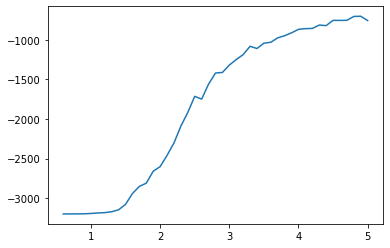

In [85]:
fig = plt.figure()
plt.plot(temperature, avarage_energy_massiv)
plt.show()
fig.savefig('saved_figure.png')

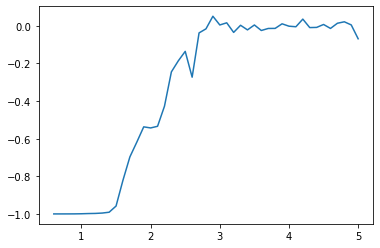

In [87]:
fig = plt.figure()
plt.plot(temperature, M_massiv)
plt.show()
fig.savefig('saved_figure_M.png')

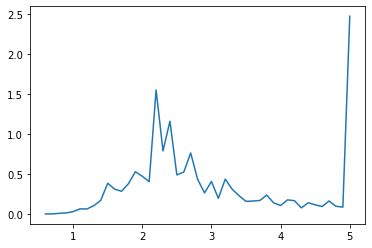

In [88]:
fig = plt.figure()
plt.plot(temperature, C_massiv)
plt.show()
fig.savefig('saved_figure_С.png')

In [95]:
temperature[25:30]

array([2.5, 2.4, 2.3, 2.2, 2.1])

In [96]:
C_massiv[25:30]

[0.4874500923289417,
 1.1584793854382054,
 0.7870821881919746,
 1.548640622145339,
 0.4030741469604831]

In [99]:
C_massiv[28]

1.548640622145339

In [3]:
def susceptibility():
    """
    Расчет восприимчивости
    """
    global L, N, T, sum_of_M, sum_of_M_square
    average_energy = (sum_of_M/N)**2
    expected_value = sum_of_M_square/(N) - average_energy
    
    result = (1/(L**2 * T**2))*expected_value
    return result


In [ ]:
#temperature_crit = np.arange(2.26, 2.2, -0.002)
opt="hot"
dimension = 2
temperature_crit = 2.2
J = 1
T = temperature_crit
N = 50000
H = 0

L_massiv = [10, 20, 40]
C_with_critical_T = [] # Теплоемкость в крит. точке при разных L
Hi_with_critical_T = [] # Восприим. в крит. точке при разных L
for new_L in L_massiv:
    L = new_L
    spin_matrix = initialize(opt) #задаем начальное положение спинов
    sum_of_M_square = 0
    sum_of_M = 0 # суммарный магнитный момент
    sum_of_energy = 0
    sum_of_energy_square = 0
    N = (L**2)*1000//5
    for i in range(N):
        metropolis_step()
    Hi_with_critical_T.append(susceptibility())
    C_with_critical_T.append(heat_capacity())

In [118]:
Hi_with_critical_T

[-0.0012553686450328767]

In [119]:
C_with_critical_T

[1.4790288366942124]

In [4]:

#temperature_crit = np.arange(2.26, 2.2, -0.002)
opt="hot"
dimension = 2
temperature_crit = 2.2
J = 1
T = temperature_crit
N = 50000
H = 0

L_massiv = [5, 7, 13, 15, 18, 25]
C_with_critical_T_new = [] # Теплоемкость в крит. точке при разных L
Hi_with_critical_T_new = [] # Восприим. в крит. точке при разных L
for new_L in L_massiv:
    L = new_L
    spin_matrix = initialize(opt) #задаем начальное положение спинов
    sum_of_M_square = 0
    sum_of_M = 0 # суммарный магнитный момент
    sum_of_energy = 0
    sum_of_energy_square = 0
    N = (L**2)*1000//6
    for i in range(N):
        metropolis_step()
    Hi_with_critical_T_new.append(susceptibility())
    C_with_critical_T_new.append(heat_capacity())

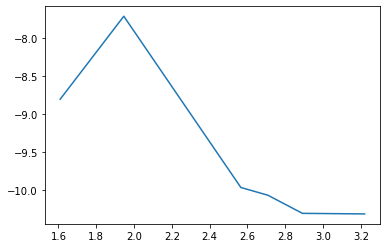

In [17]:
fig = plt.figure()
plt.plot(np.log(L_massiv), np.log(Hi_with_critical_T_new))
plt.show()
#fig.savefig('saved_figure_С.png')

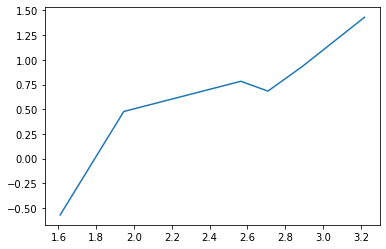

In [20]:
fig = plt.figure()
plt.plot(np.log(L_massiv), np.log(C_with_critical_T_new))
plt.show() 

In [14]:
np.log(L_massiv)

array([1.60943791, 1.94591015, 2.56494936, 2.7080502 , 2.89037176,
       3.21887582])

In [19]:
C_with_critical_T_new

[0.5658658222728319,
 1.6119214732233187,
 2.188185651185176,
 1.9810285486715307,
 2.5434137457629196,
 4.18334010784468]

In [21]:
Hi_with_critical_T_new

[0.0001503324792345882,
 0.0004483968025569746,
 4.705183622079869e-05,
 4.2489508548803464e-05,
 3.347588507879305e-05,
 3.3229099874706714e-05]